In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit

Using TensorFlow backend.


In [2]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

# Matmul_Simulated

(1900, 23) (1900,)
(1520, 23) (380, 23) (1520,) (380,)


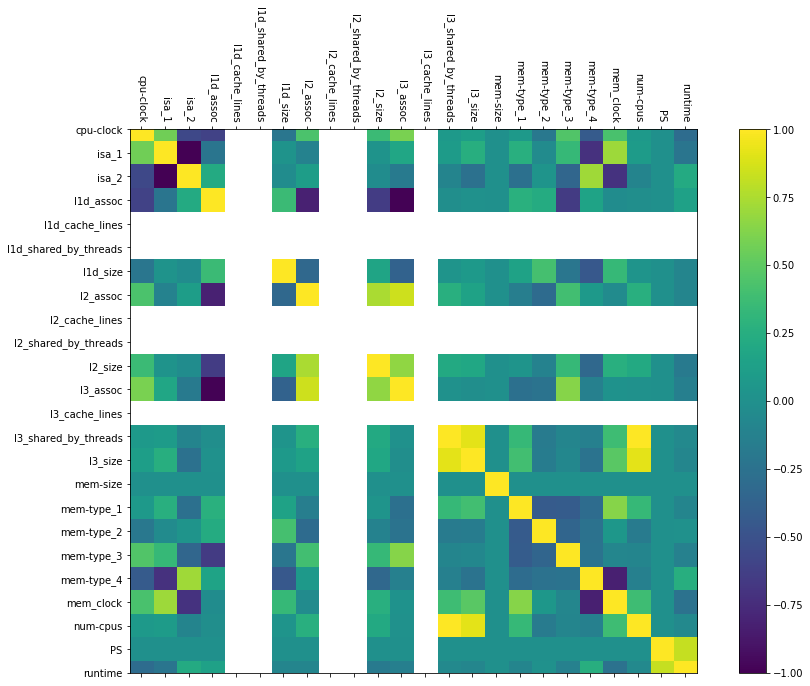

In [28]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\Simulator\\matmul.csv')
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, 
                                                                         encoder_mem_type=None)
total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
total_data = total_data.fillna(0)
# X_columns = total_data.drop(columns = 'PS').columns
# X = total_data.drop(columns = ['runtime','PS']).to_numpy()
X = total_data.drop(columns = ['runtime']).to_numpy()
X_columns = total_data.columns
Y = total_data['runtime'].to_numpy()
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
train_data = total_data
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,24,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
# plt.figure(figsize=(30,20))
plt.show()

# Matmul Physical

(280, 22) (280,)
(224, 22) (56, 22) (224,) (56,)


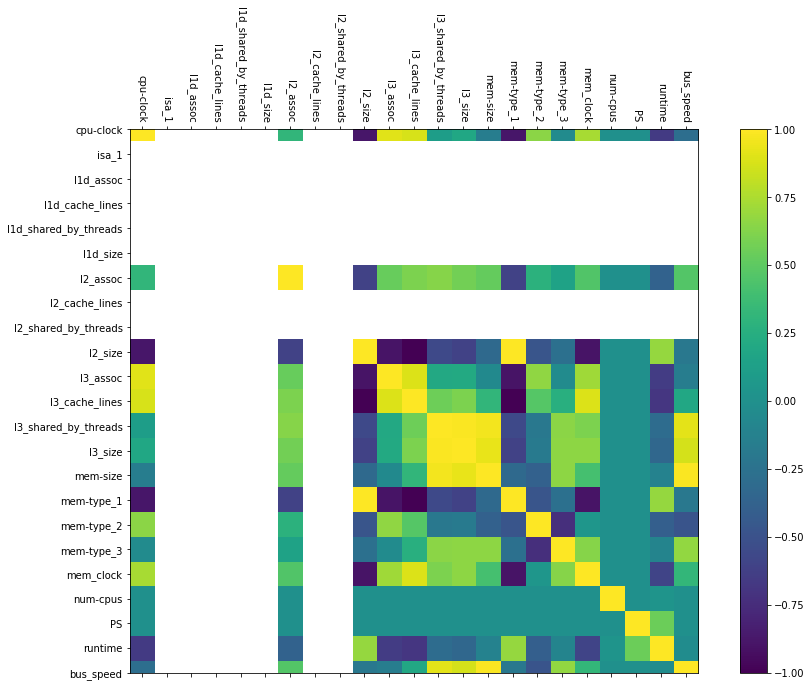

In [38]:
# df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\Simulator\\matmul.csv')
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\matmul_lab_omp.csv')
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, 
                                                                         encoder_mem_type=None)
# total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])
total_data = total_data.fillna(0)
# X_columns = total_data.drop(columns = 'PS').columns
# X = total_data.drop(columns = ['runtime','PS']).to_numpy()
X = total_data.drop(columns = ['runtime']).to_numpy()
X_columns = total_data.columns
Y = total_data['runtime'].to_numpy()
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
train_data = total_data
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
# plt.figure(figsize=(30,20))
plt.show()

# Montecarlo Simulated

(1425, 23) (1425,)
(1140, 23) (285, 23) (1140,) (285,)


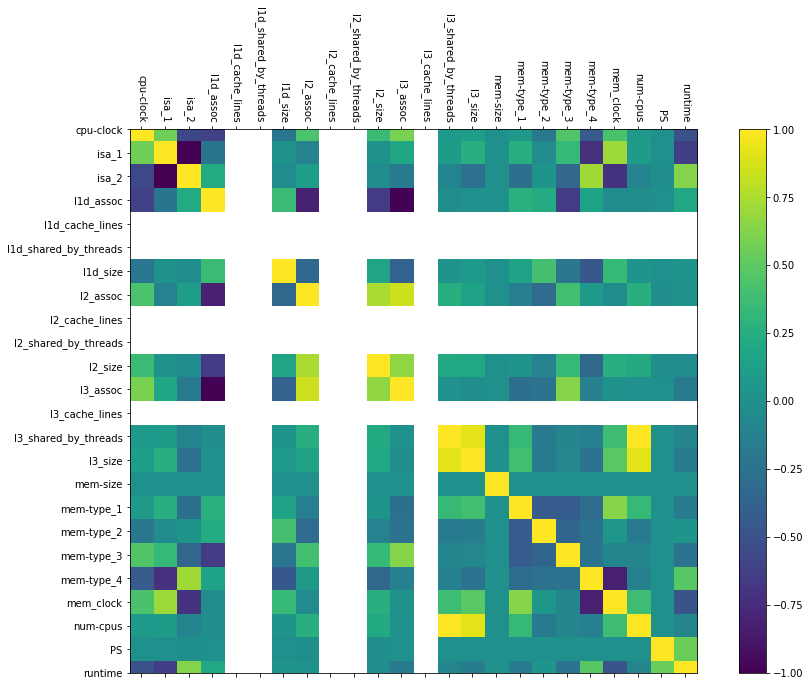

In [33]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\Simulator\\montecarlocalcpi.csv')
# df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\matmul_lab_omp.csv')
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, 
                                                                         encoder_mem_type=None)
total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
# total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])
total_data = total_data.fillna(0)
# X_columns = total_data.drop(columns = 'PS').columns
# X = total_data.drop(columns = ['runtime','PS']).to_numpy()
X = total_data.drop(columns = ['runtime']).to_numpy()
X_columns = total_data.columns
Y = total_data['runtime'].to_numpy()
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
train_data = total_data
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,24,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
# plt.figure(figsize=(30,20))
plt.show()

# Montecarlo Physical

(224, 22) (224,)
(179, 22) (45, 22) (179,) (45,)


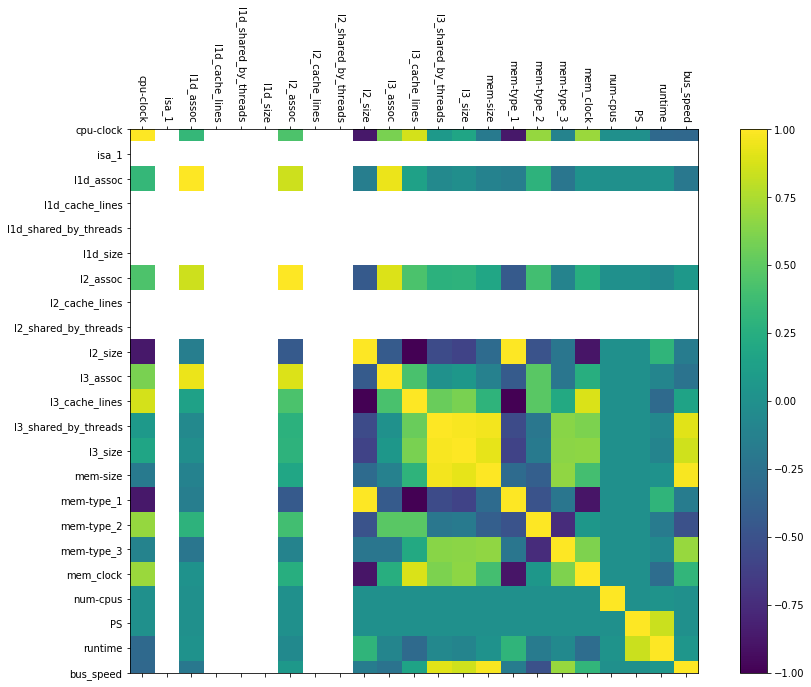

In [39]:
# df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\Simulator\\montecarlocalcpi.csv')
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\montecarlo_lab_omp.csv')
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, 
                                                                         encoder_mem_type=None)
# total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])
total_data = total_data.fillna(0)
# X_columns = total_data.drop(columns = 'PS').columns
# X = total_data.drop(columns = ['runtime','PS']).to_numpy()
X = total_data.drop(columns = ['runtime']).to_numpy()
X_columns = total_data.columns
Y = total_data['runtime'].to_numpy()
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
train_data = total_data
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
# plt.figure(figsize=(30,20))
plt.show()

# MSER Simulated

(475, 22) (475,)
(380, 22) (95, 22) (380,) (95,)


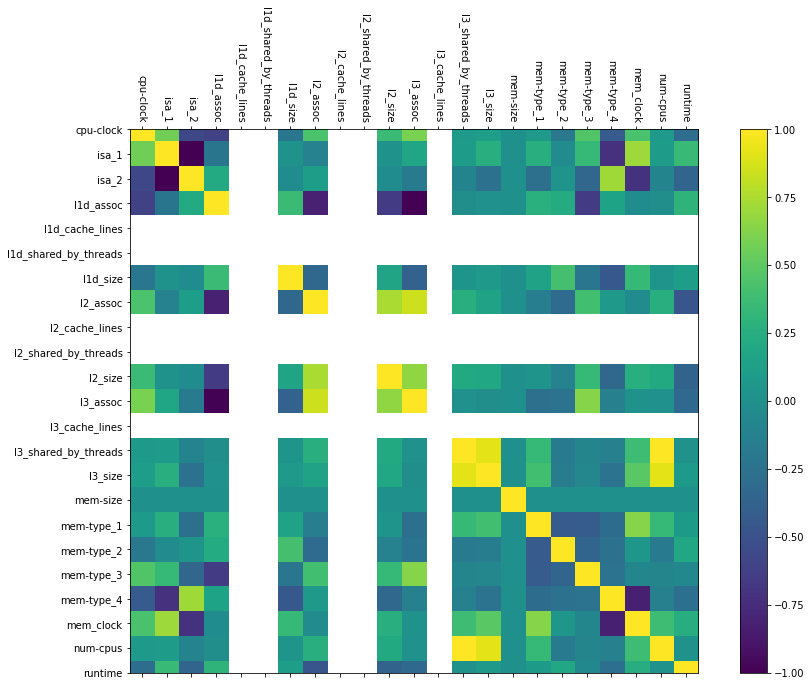

In [46]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\Simulator\\mser.csv')
# df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\matmul_lab_omp.csv')
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, 
                                                                         encoder_mem_type=None)
total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
# total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])
total_data = total_data.fillna(0)
# X_columns = total_data.drop(columns = 'PS').columns
X = total_data.drop(columns = ['runtime','PS']).to_numpy()
# X = total_data.drop(columns = ['runtime']).to_numpy()
X_columns = total_data.columns
Y = total_data['runtime'].to_numpy()
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
train_data = total_data.drop(columns = 'PS')
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
# plt.figure(figsize=(30,20))
plt.show()

# Mantevo MiniFE Physcial

(124, 23) (124,)
(99, 23) (25, 23) (99,) (25,)


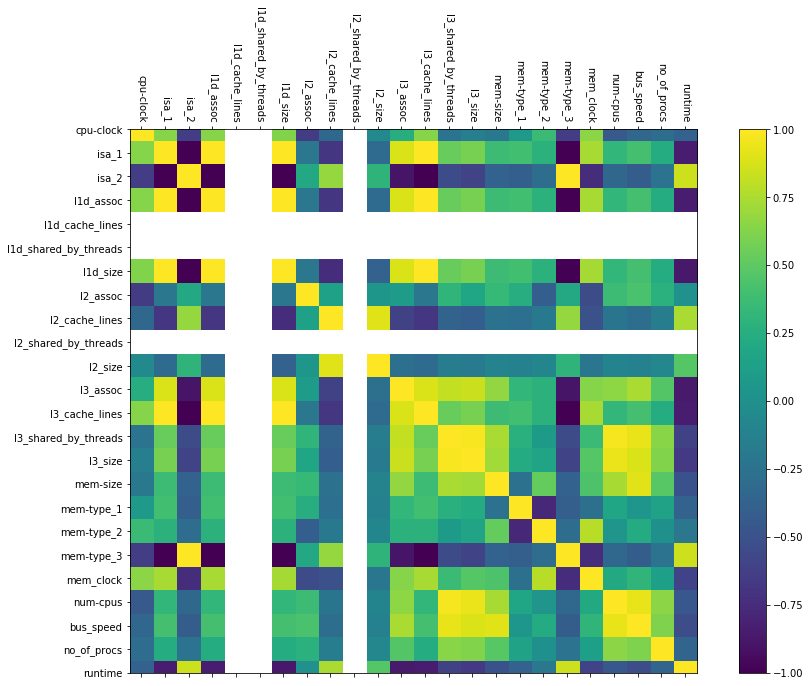

In [51]:
# df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\Simulator\\mser.csv')
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\runtimes_final_mantevo_miniFE.csv')
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, 
                                                                         encoder_mem_type=None)
# total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
total_data = encoded_data_frame.drop(columns = ['arch', 'sysname', 'sys', 'executable'])
# total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])
total_data = total_data.fillna(0)
# X_columns = total_data.drop(columns = 'PS').columns
X = total_data.drop(columns = ['runtime','PS']).to_numpy()
# X = total_data.drop(columns = ['runtime']).to_numpy()
X_columns = total_data.columns
Y = total_data['runtime'].to_numpy()
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
train_data = total_data.drop(columns = 'PS')
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,24,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
# plt.figure(figsize=(30,20))
plt.show()

# NPB EP Physical

(108, 21) (108,)
(86, 21) (22, 21) (86,) (22,)


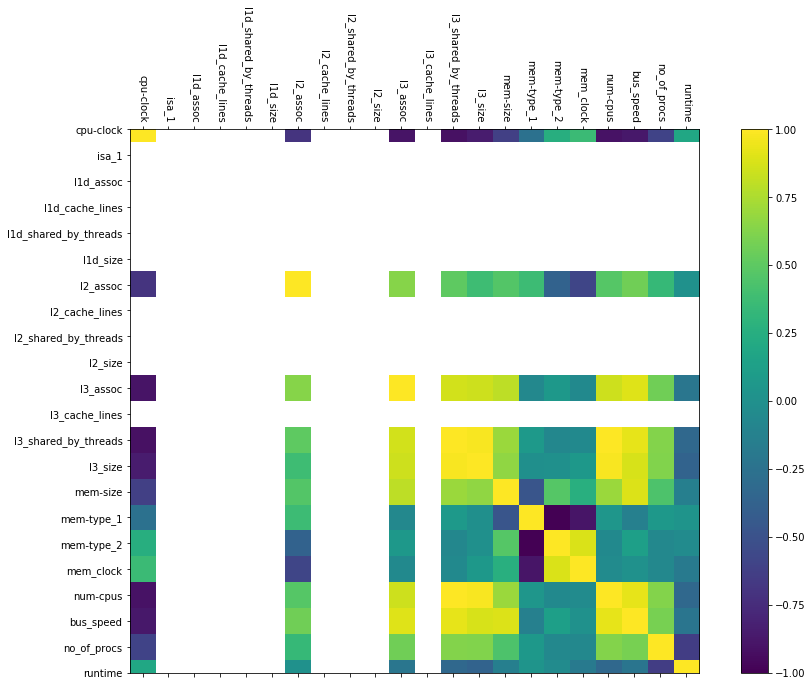

In [53]:
# df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\Simulator\\mser.csv')
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\runtimes_final_npb_ep.csv')
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, 
                                                                         encoder_mem_type=None)
# total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
total_data = encoded_data_frame.drop(columns = ['arch', 'sysname', 'sys', 'executable'])
# total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])
total_data = total_data.fillna(0)
# X_columns = total_data.drop(columns = 'PS').columns
X = total_data.drop(columns = ['runtime','PS']).to_numpy()
# X = total_data.drop(columns = ['runtime']).to_numpy()
X_columns = total_data.columns
Y = total_data['runtime'].to_numpy()
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
train_data = total_data.drop(columns = 'PS')
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,22,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
# plt.figure(figsize=(30,20))
plt.show()

# NPB MG Physical

(108, 21) (108,)
(86, 21) (22, 21) (86,) (22,)


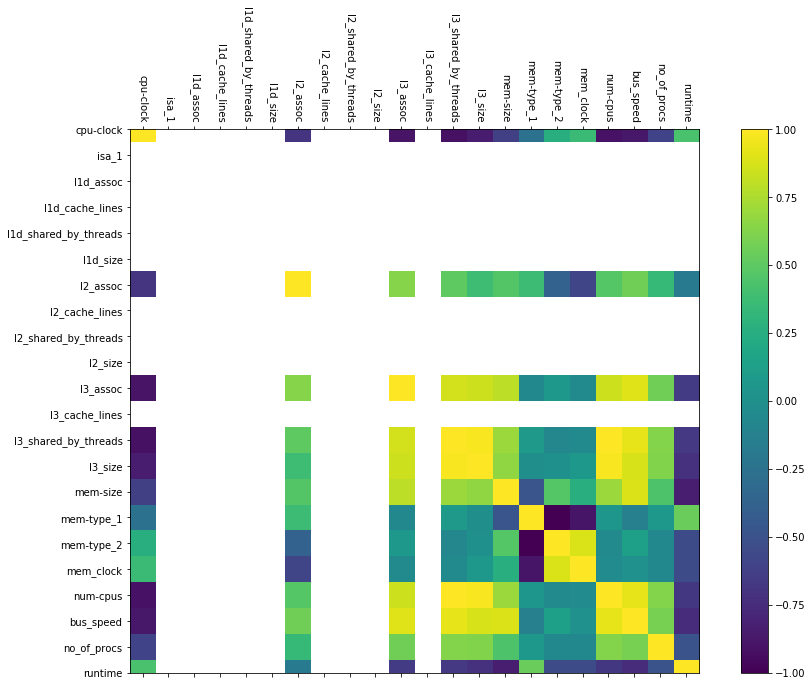

In [55]:
# df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\Simulator\\mser.csv')
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\runtimes_final_npb_mg.csv')
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, 
                                                                         encoder_mem_type=None)
# total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
total_data = encoded_data_frame.drop(columns = ['arch', 'sysname', 'sys', 'executable'])
# total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])
total_data = total_data.fillna(0)
# X_columns = total_data.drop(columns = 'PS').columns
X = total_data.drop(columns = ['runtime','PS']).to_numpy()
# X = total_data.drop(columns = ['runtime']).to_numpy()
X_columns = total_data.columns
Y = total_data['runtime'].to_numpy()
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
train_data = total_data.drop(columns = 'PS')
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,22,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
# plt.figure(figsize=(30,20))
plt.show()

# Tracking Simulated

(475, 22) (475,)
(380, 22) (95, 22) (380,) (95,)


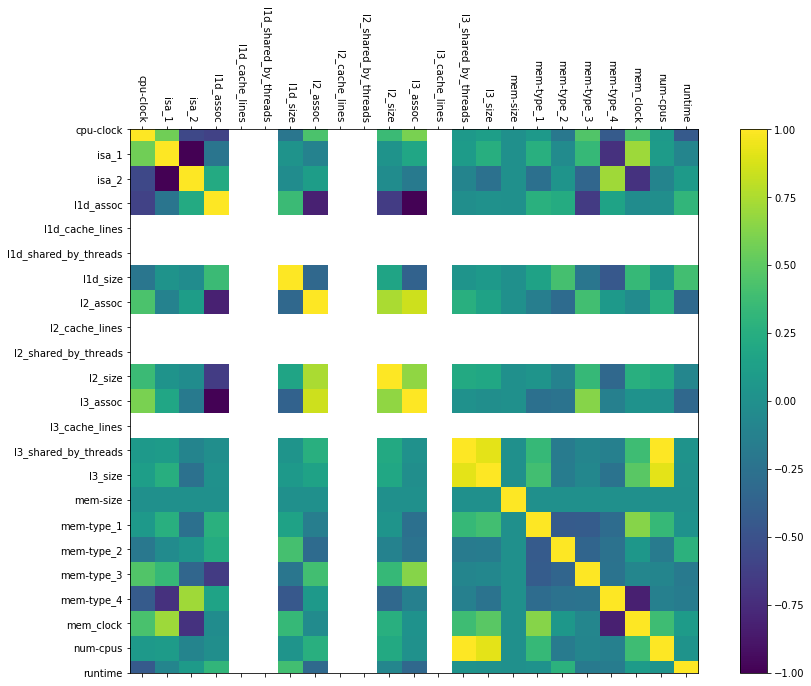

In [57]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\Simulator\\tracking.csv')
# df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\matmul_lab_omp.csv')
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, 
                                                                         encoder_mem_type=None)
total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
# total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])
total_data = total_data.fillna(0)
# X_columns = total_data.drop(columns = 'PS').columns
X = total_data.drop(columns = ['runtime','PS']).to_numpy()
# X = total_data.drop(columns = ['runtime']).to_numpy()
X_columns = total_data.columns
Y = total_data['runtime'].to_numpy()
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
train_data = total_data.drop(columns = 'PS')
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
# plt.figure(figsize=(30,20))
plt.show()